In [ ]:
1) Explain Bagging and Boosting methods. How is it different from each other.
Answer-Bagging (Bootstrap Aggregating)

Method: Train multiple models independently on different random subsets of the data and average their predictions.
Goal: Reduce variance and prevent overfitting.
Example: Random Forest.

Boosting
Method: Train models sequentially, each focusing on correcting errors made by previous models, and combine their predictions using a weighted sum.
Goal: Reduce both bias and variance, improving overall accuracy.
Example: AdaBoost, Gradient Boosting, XGBoost.
    
Key Differences
Training: Bagging trains models in parallel; boosting trains models sequentially.
Error Focus: Bagging does not emphasize hard-to-predict instances; boosting focuses on them.
Aggregation: Bagging uses averaging or majority voting; boosting uses weighted sums.
    

In [ ]:
2) Explain how to handle imbalance in the data.
Answer : Handling Imbalanced Data
1.Resampling Techniques:*
   - Oversampling:* Increase minority class instances (e.g., SMOTE).
   - Undersampling:* Reduce majority class instances.

2.Cost-Sensitive Learning:*
   - Adjust algorithm to give more weight to the minority class.

3.Ensemble Methods:*
   - Use methods like Balanced Random Forest or modified boosting algorithms.

4.Appropriate Metrics:*
   - Use precision, recall, F1-score, and AUC-ROC instead of accuracy.

5.Stratified Sampling:*
   - Ensure train-test splits maintain class distribution.
    
6.Anomaly Detection Algorithms:*
   - Consider for extremely imbalanced datasets.

7. Using Different Thresholds
Adjusting the decision threshold for predicting classes can help optimize for the desired trade-off between precision and recall, especially in the context of the specific problem's requirements.create multiple balanced subsets of the original dataset, apply a classifier to each subset, and then combine the predictions.

In [1]:
# Import Libraries

In [21]:
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [39]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\archive\glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [40]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [42]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

**Data Visualization** 

**Histogram**

In [43]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


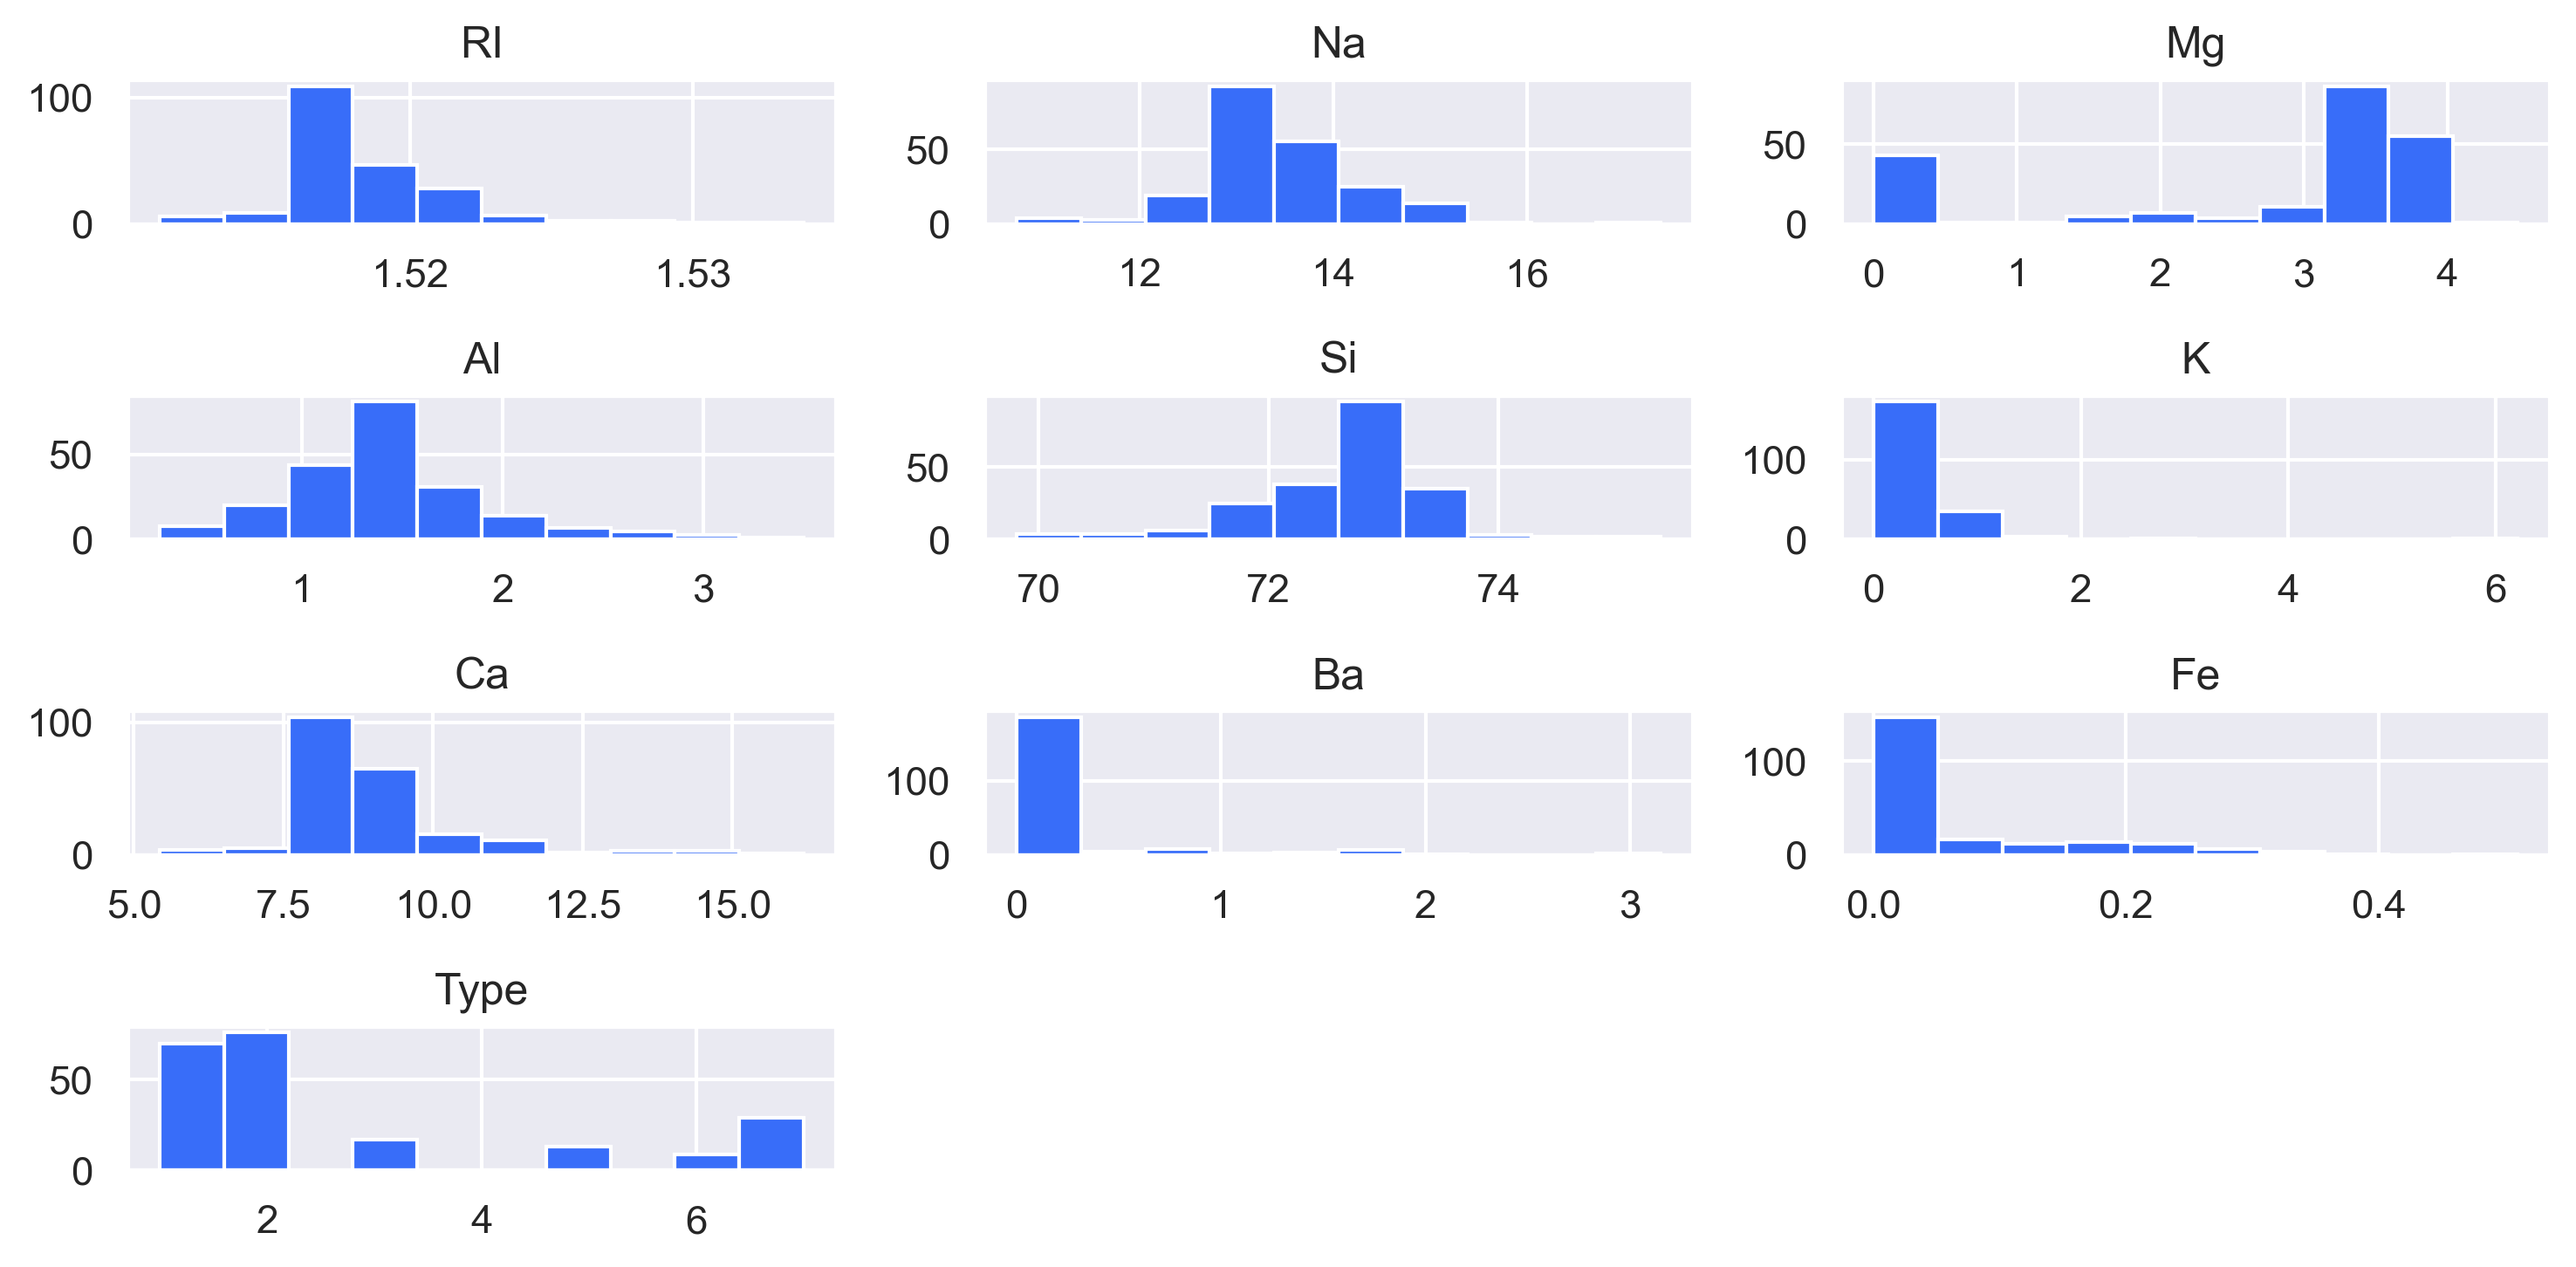

In [44]:
#outlier detection
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
df.hist()
plt.tight_layout()

**Boxplot**

<Axes: >

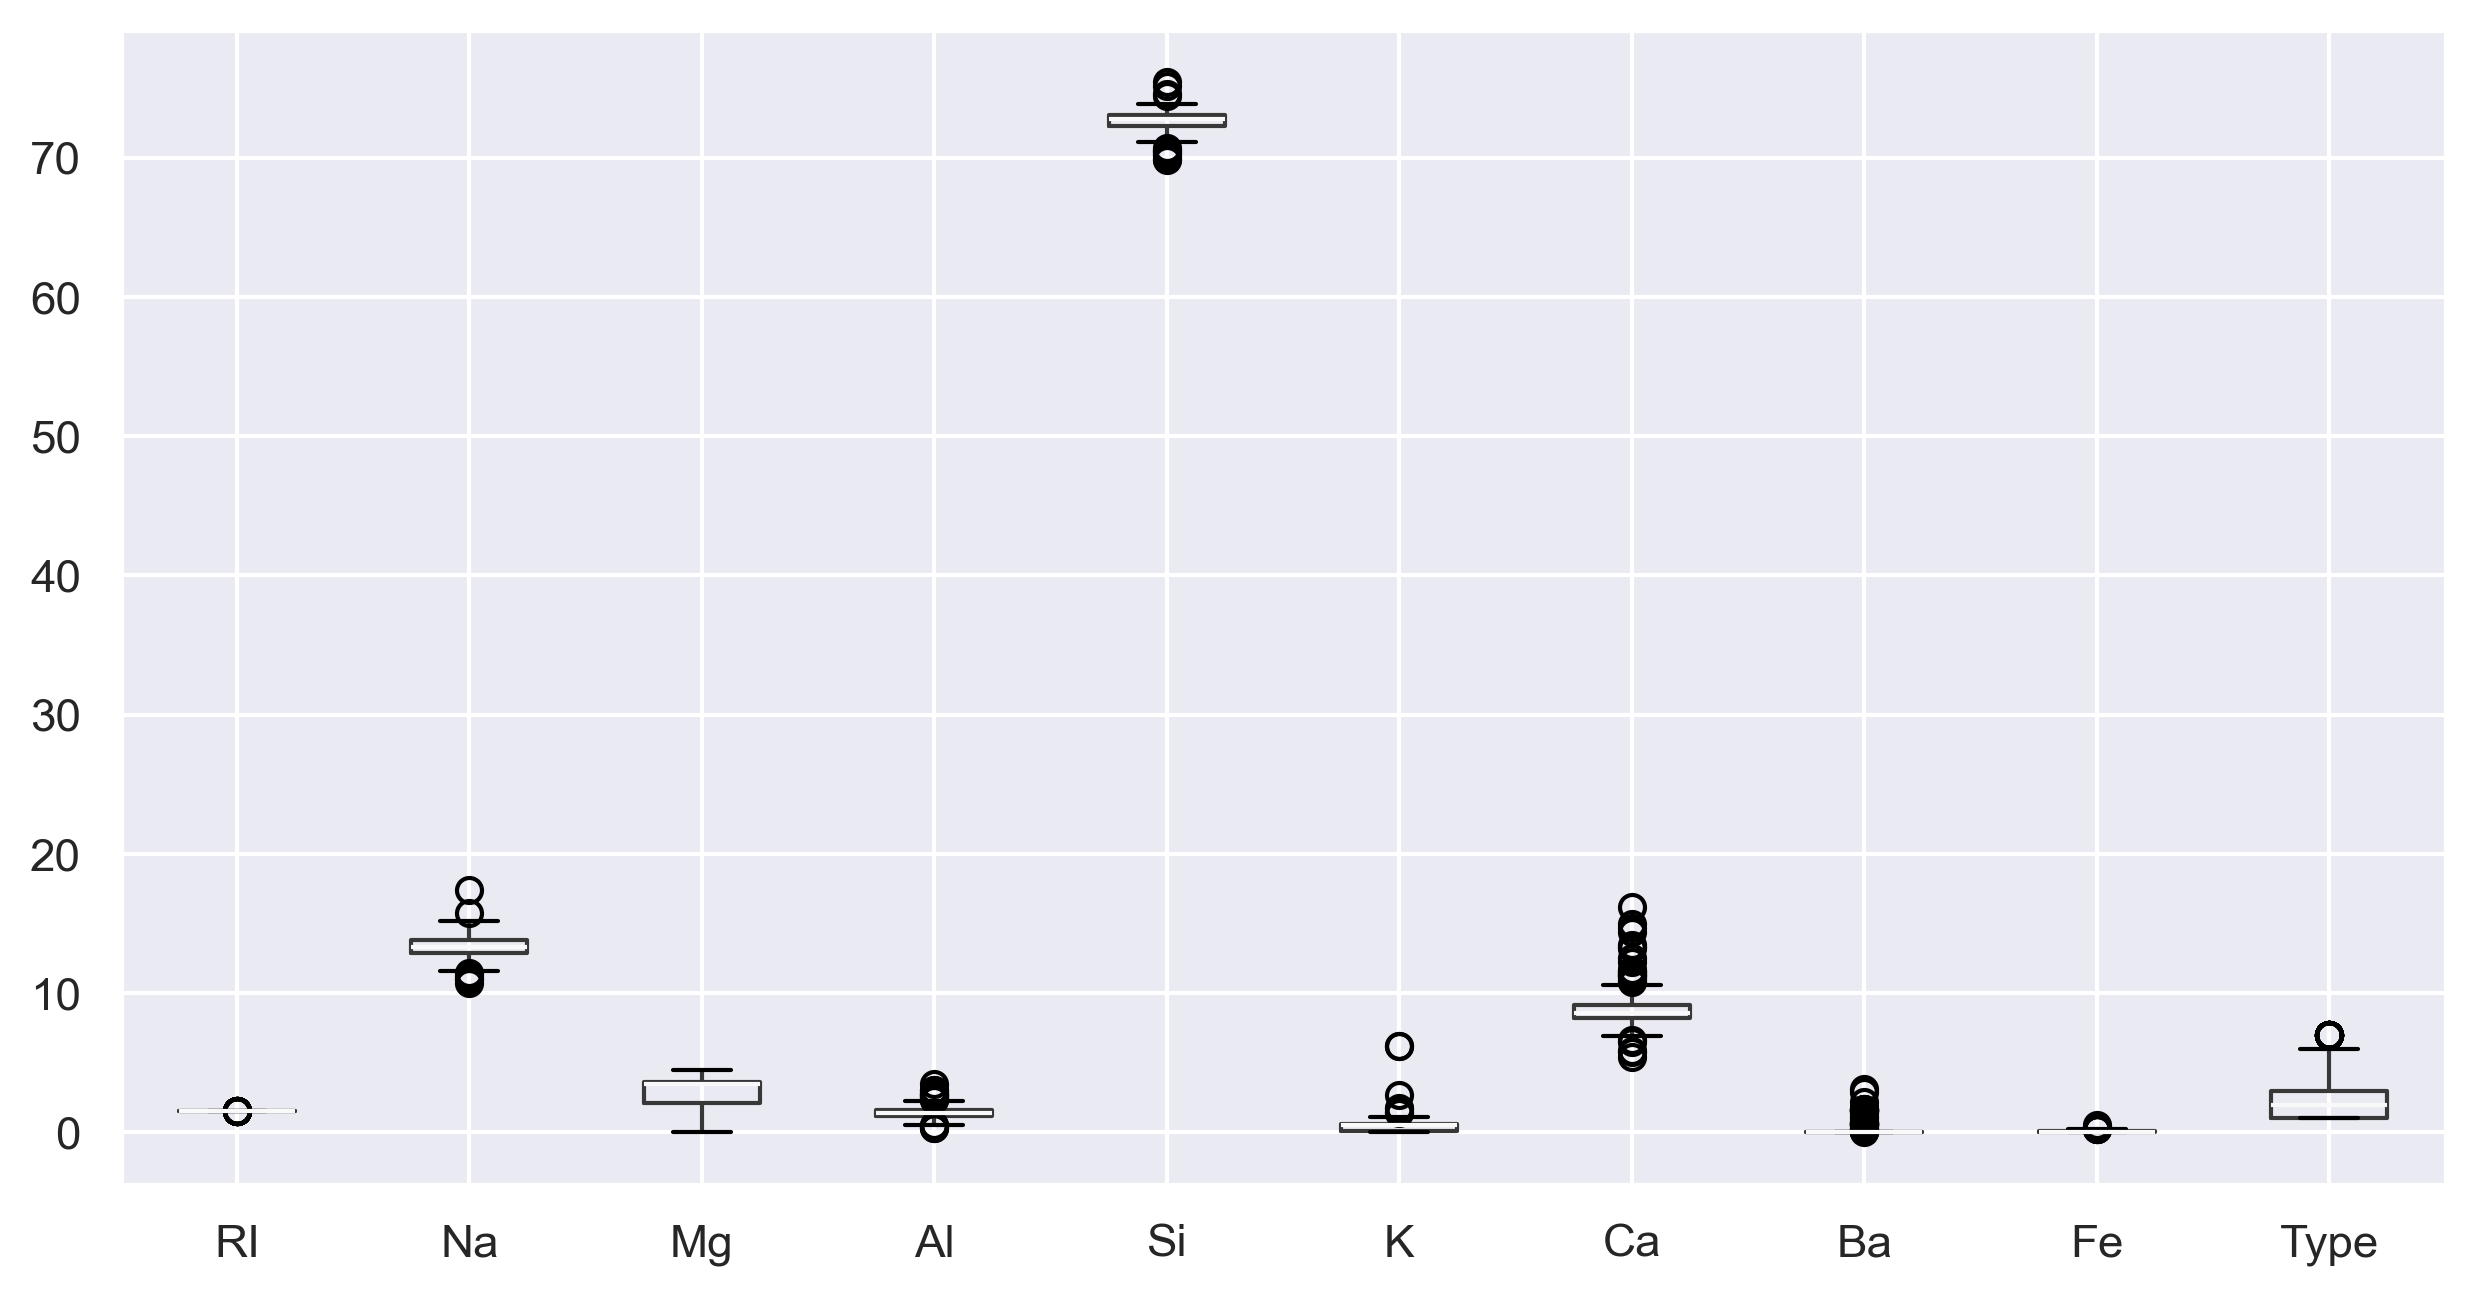

In [45]:
df.boxplot()

In [46]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [47]:
outlier_detection(df,df.columns)

<Axes: >

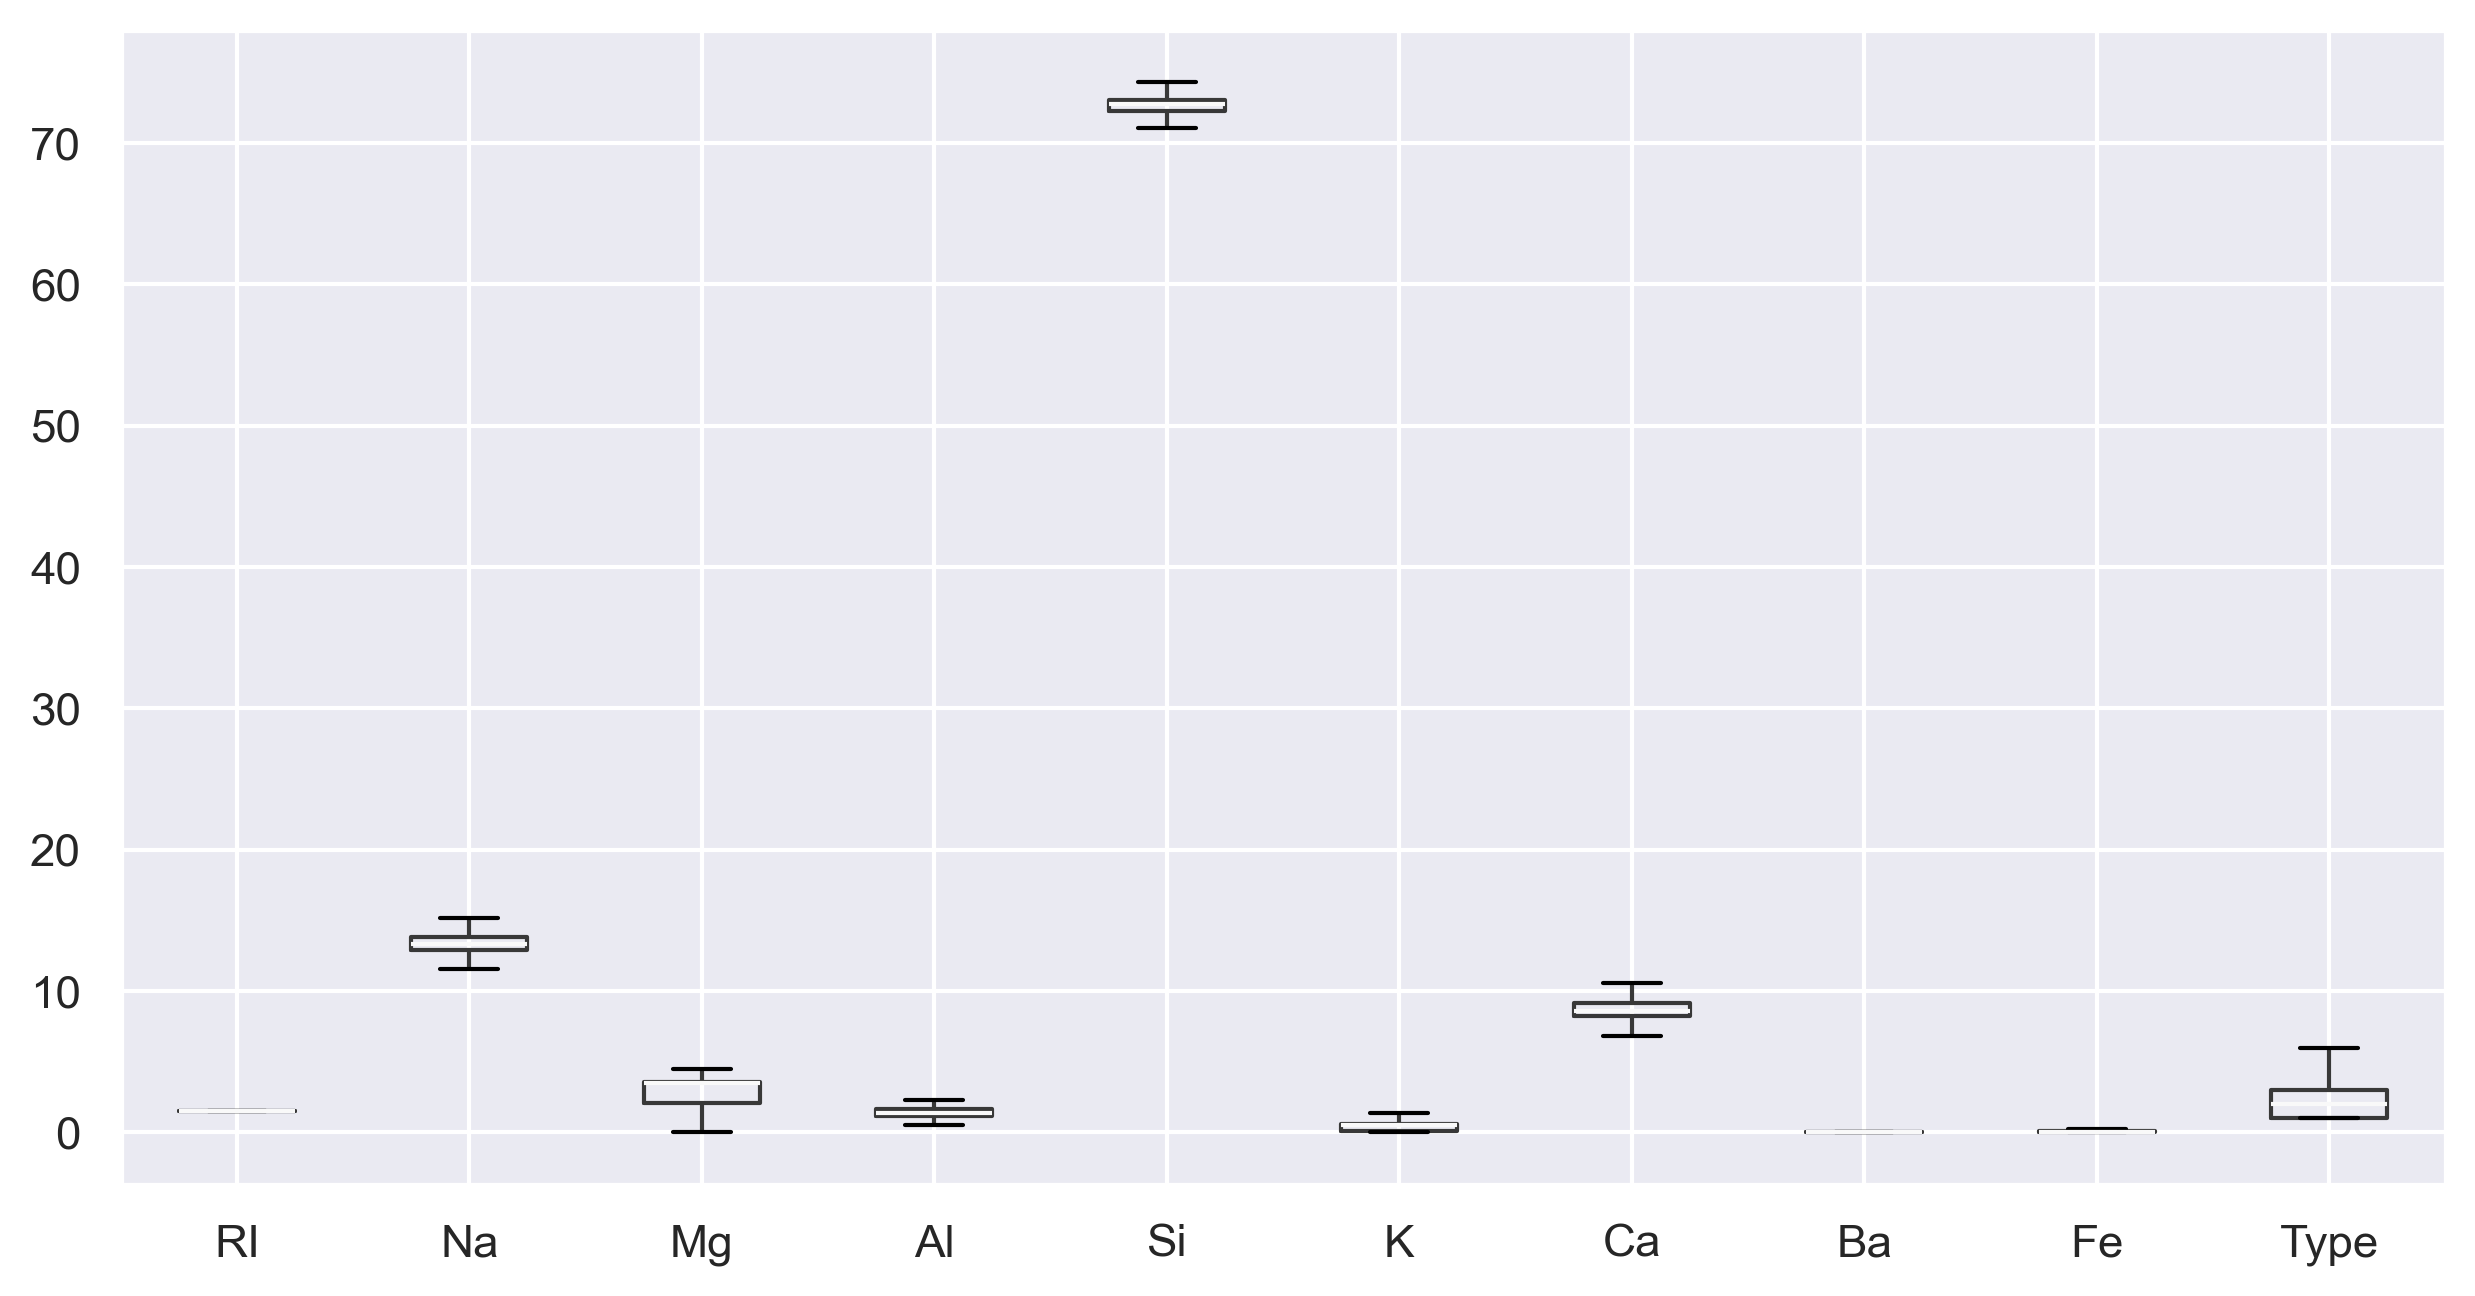

In [48]:
df.boxplot()

In [49]:
df.drop(columns=['Ba'],inplace=True)

**Scatterplot**

<Axes: xlabel='Na', ylabel='Type'>

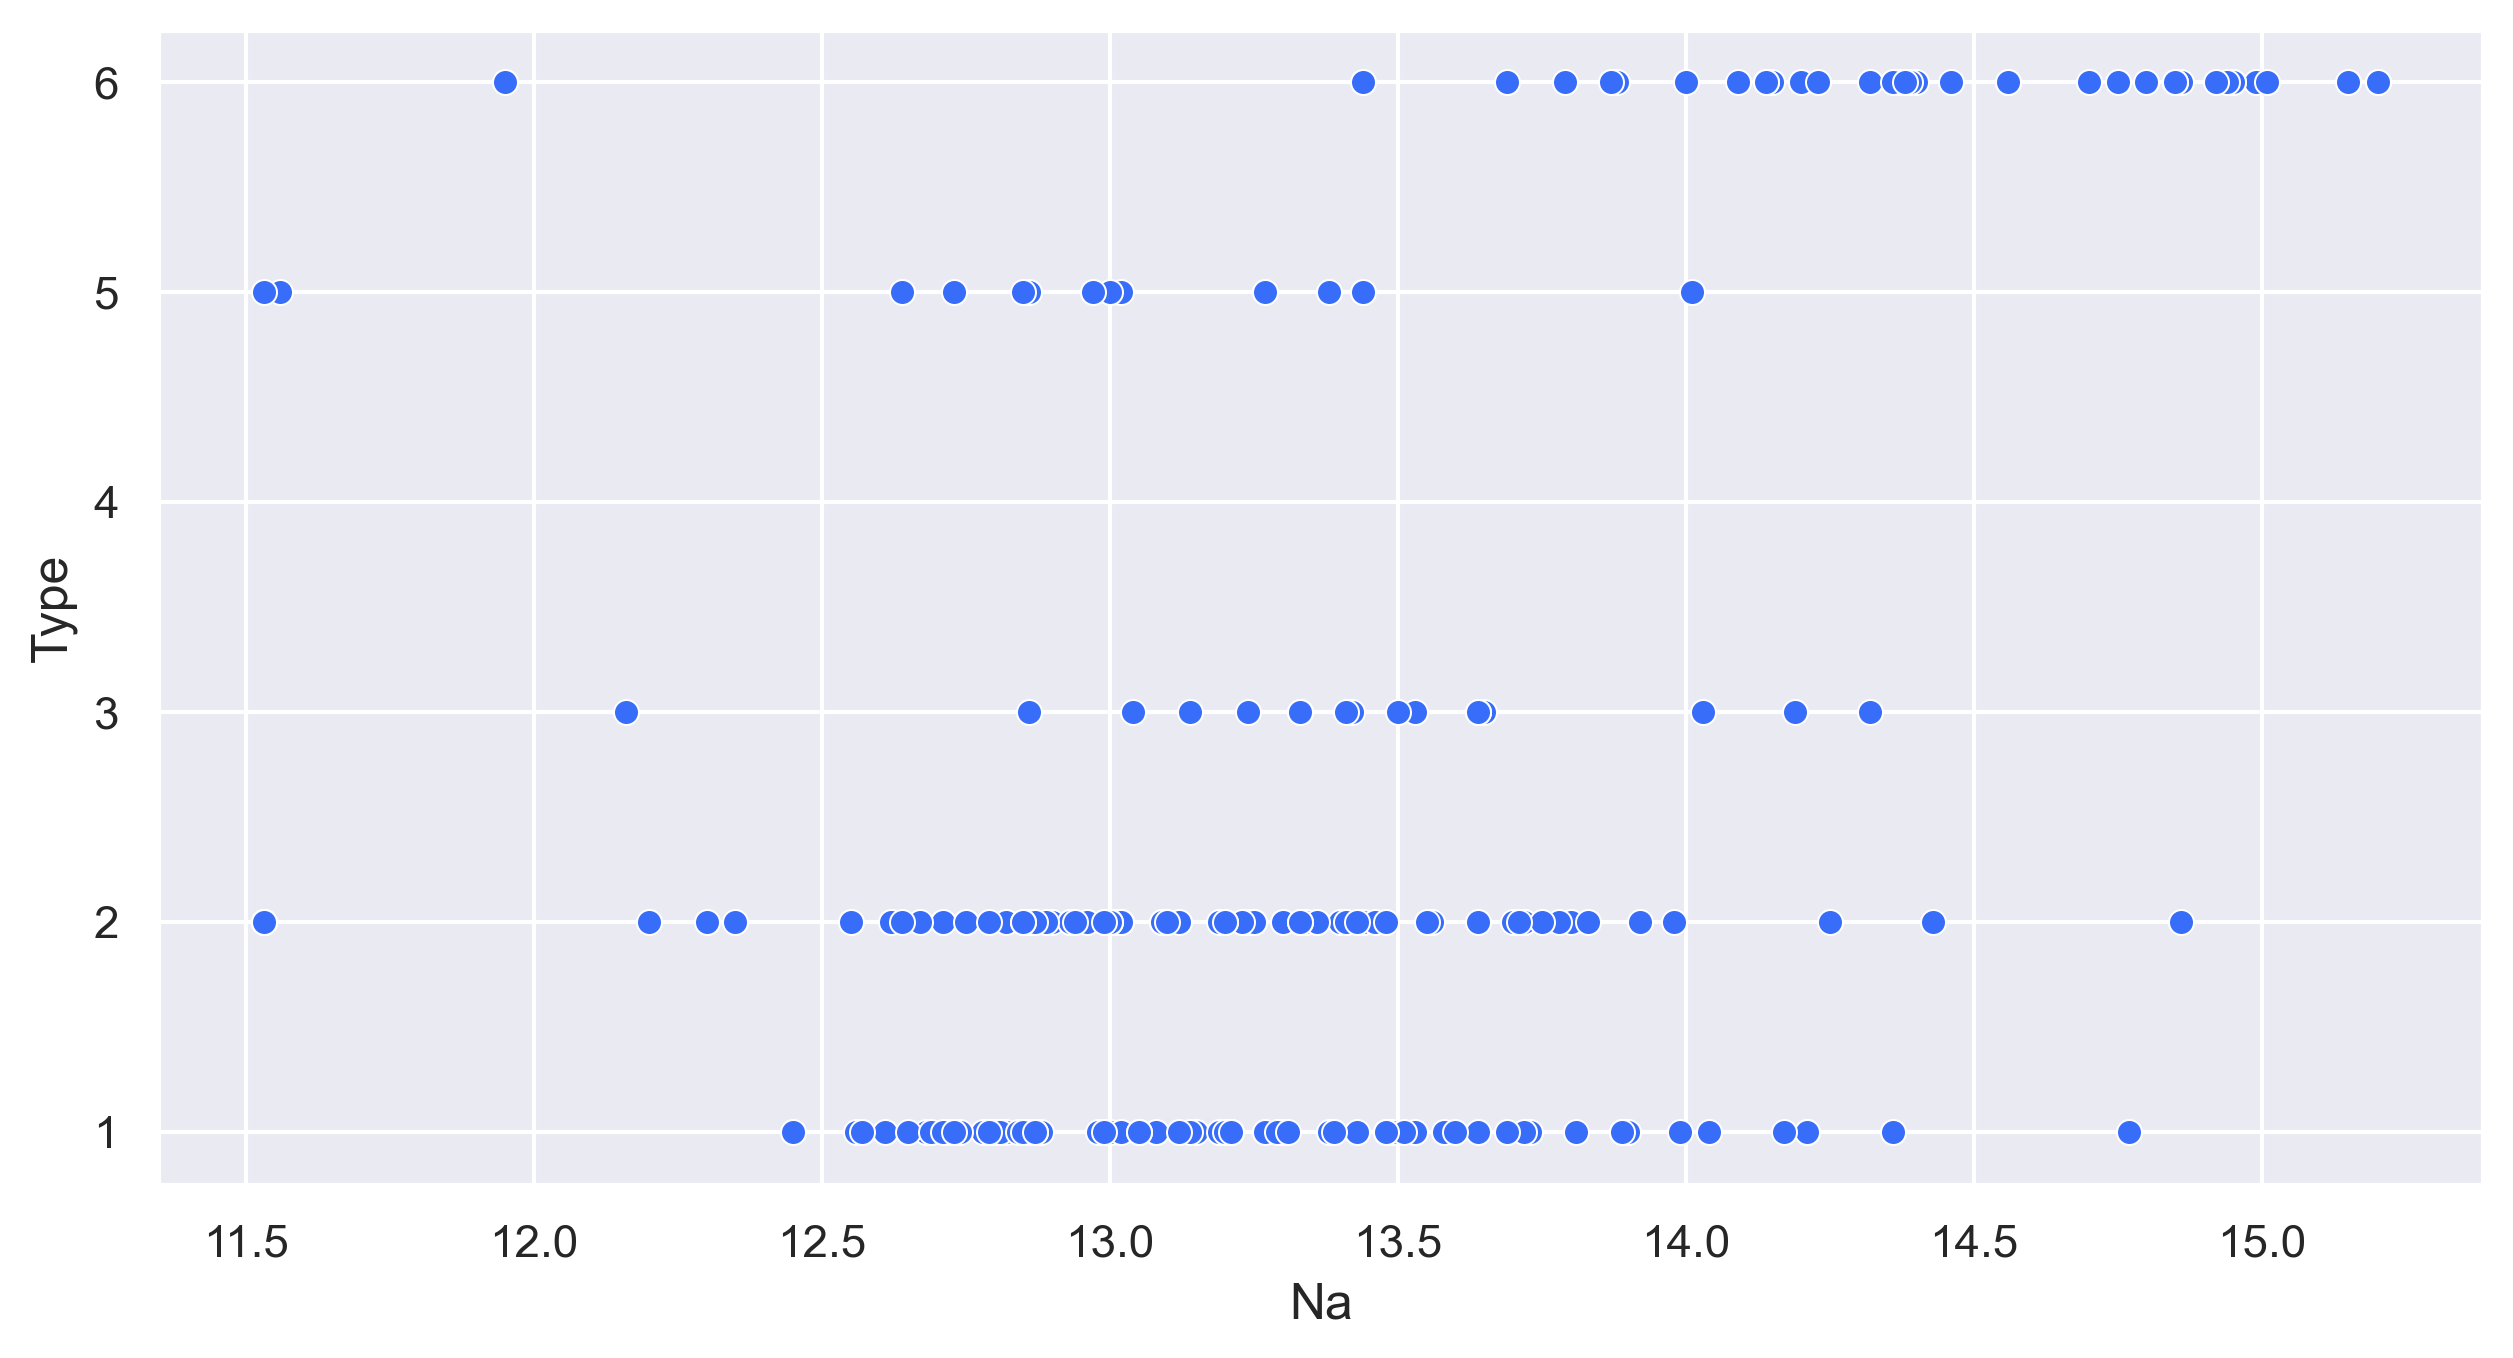

In [50]:
sns.scatterplot(x = df['Na'], y =df['Type'])

<Axes: xlabel='Mg', ylabel='Type'>

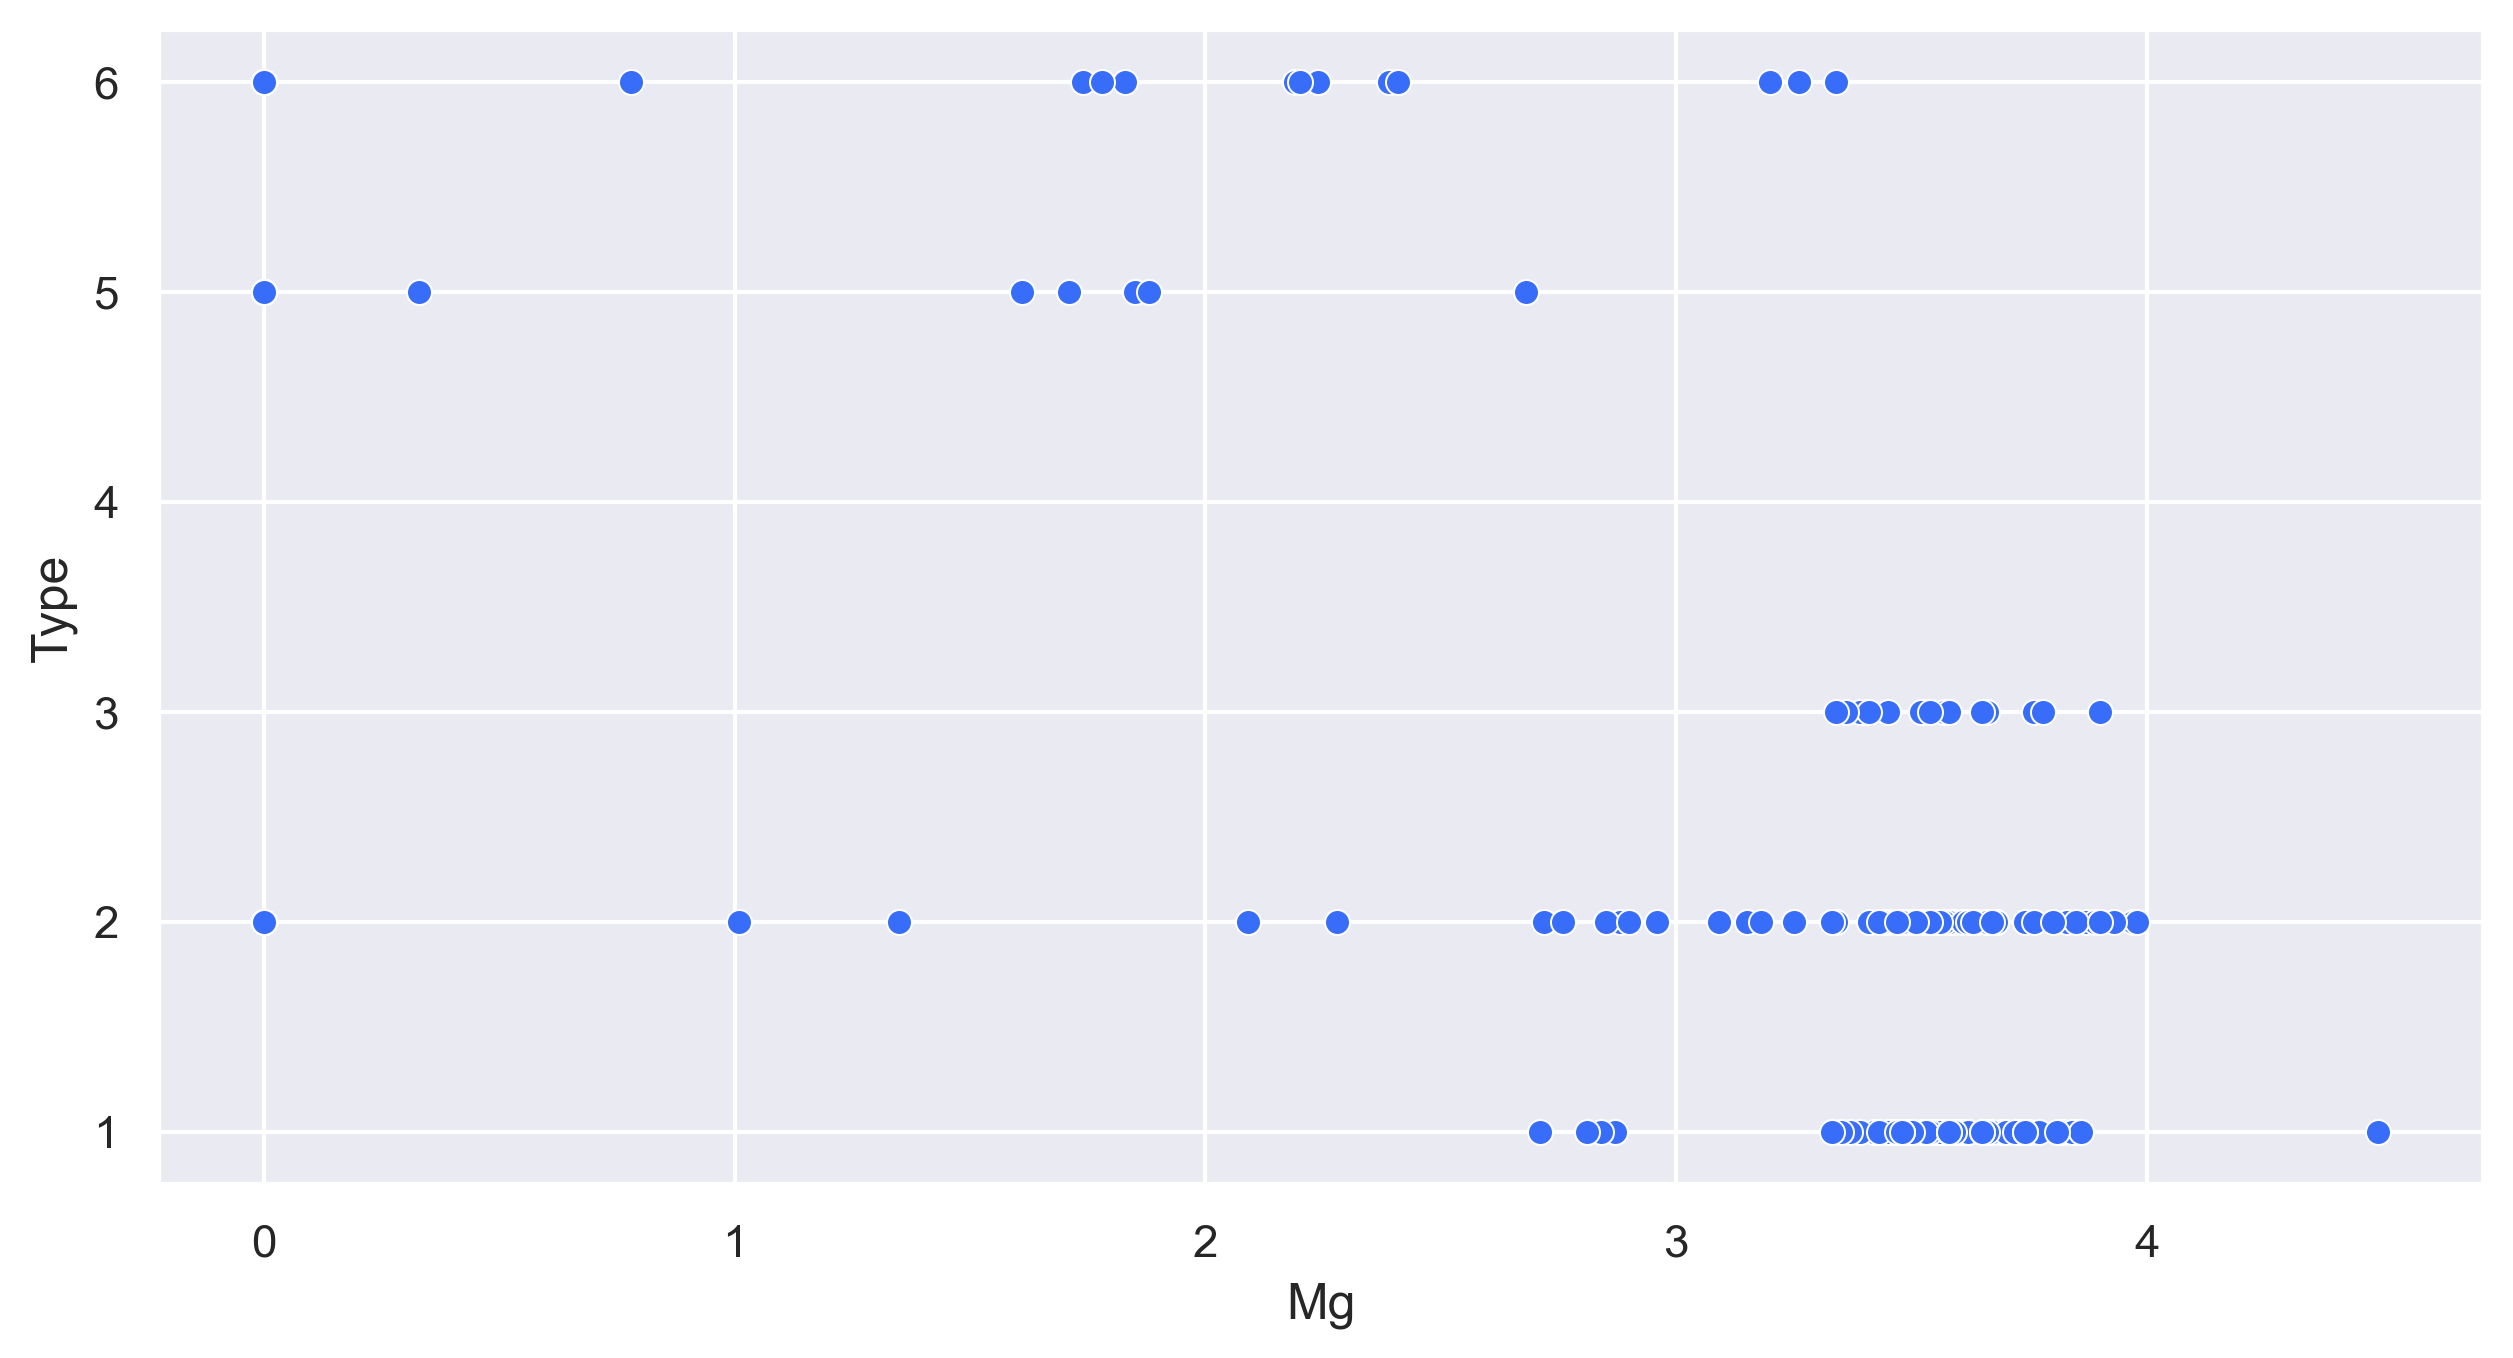

In [51]:
sns.scatterplot(x = df['Mg'], y =df['Type'])

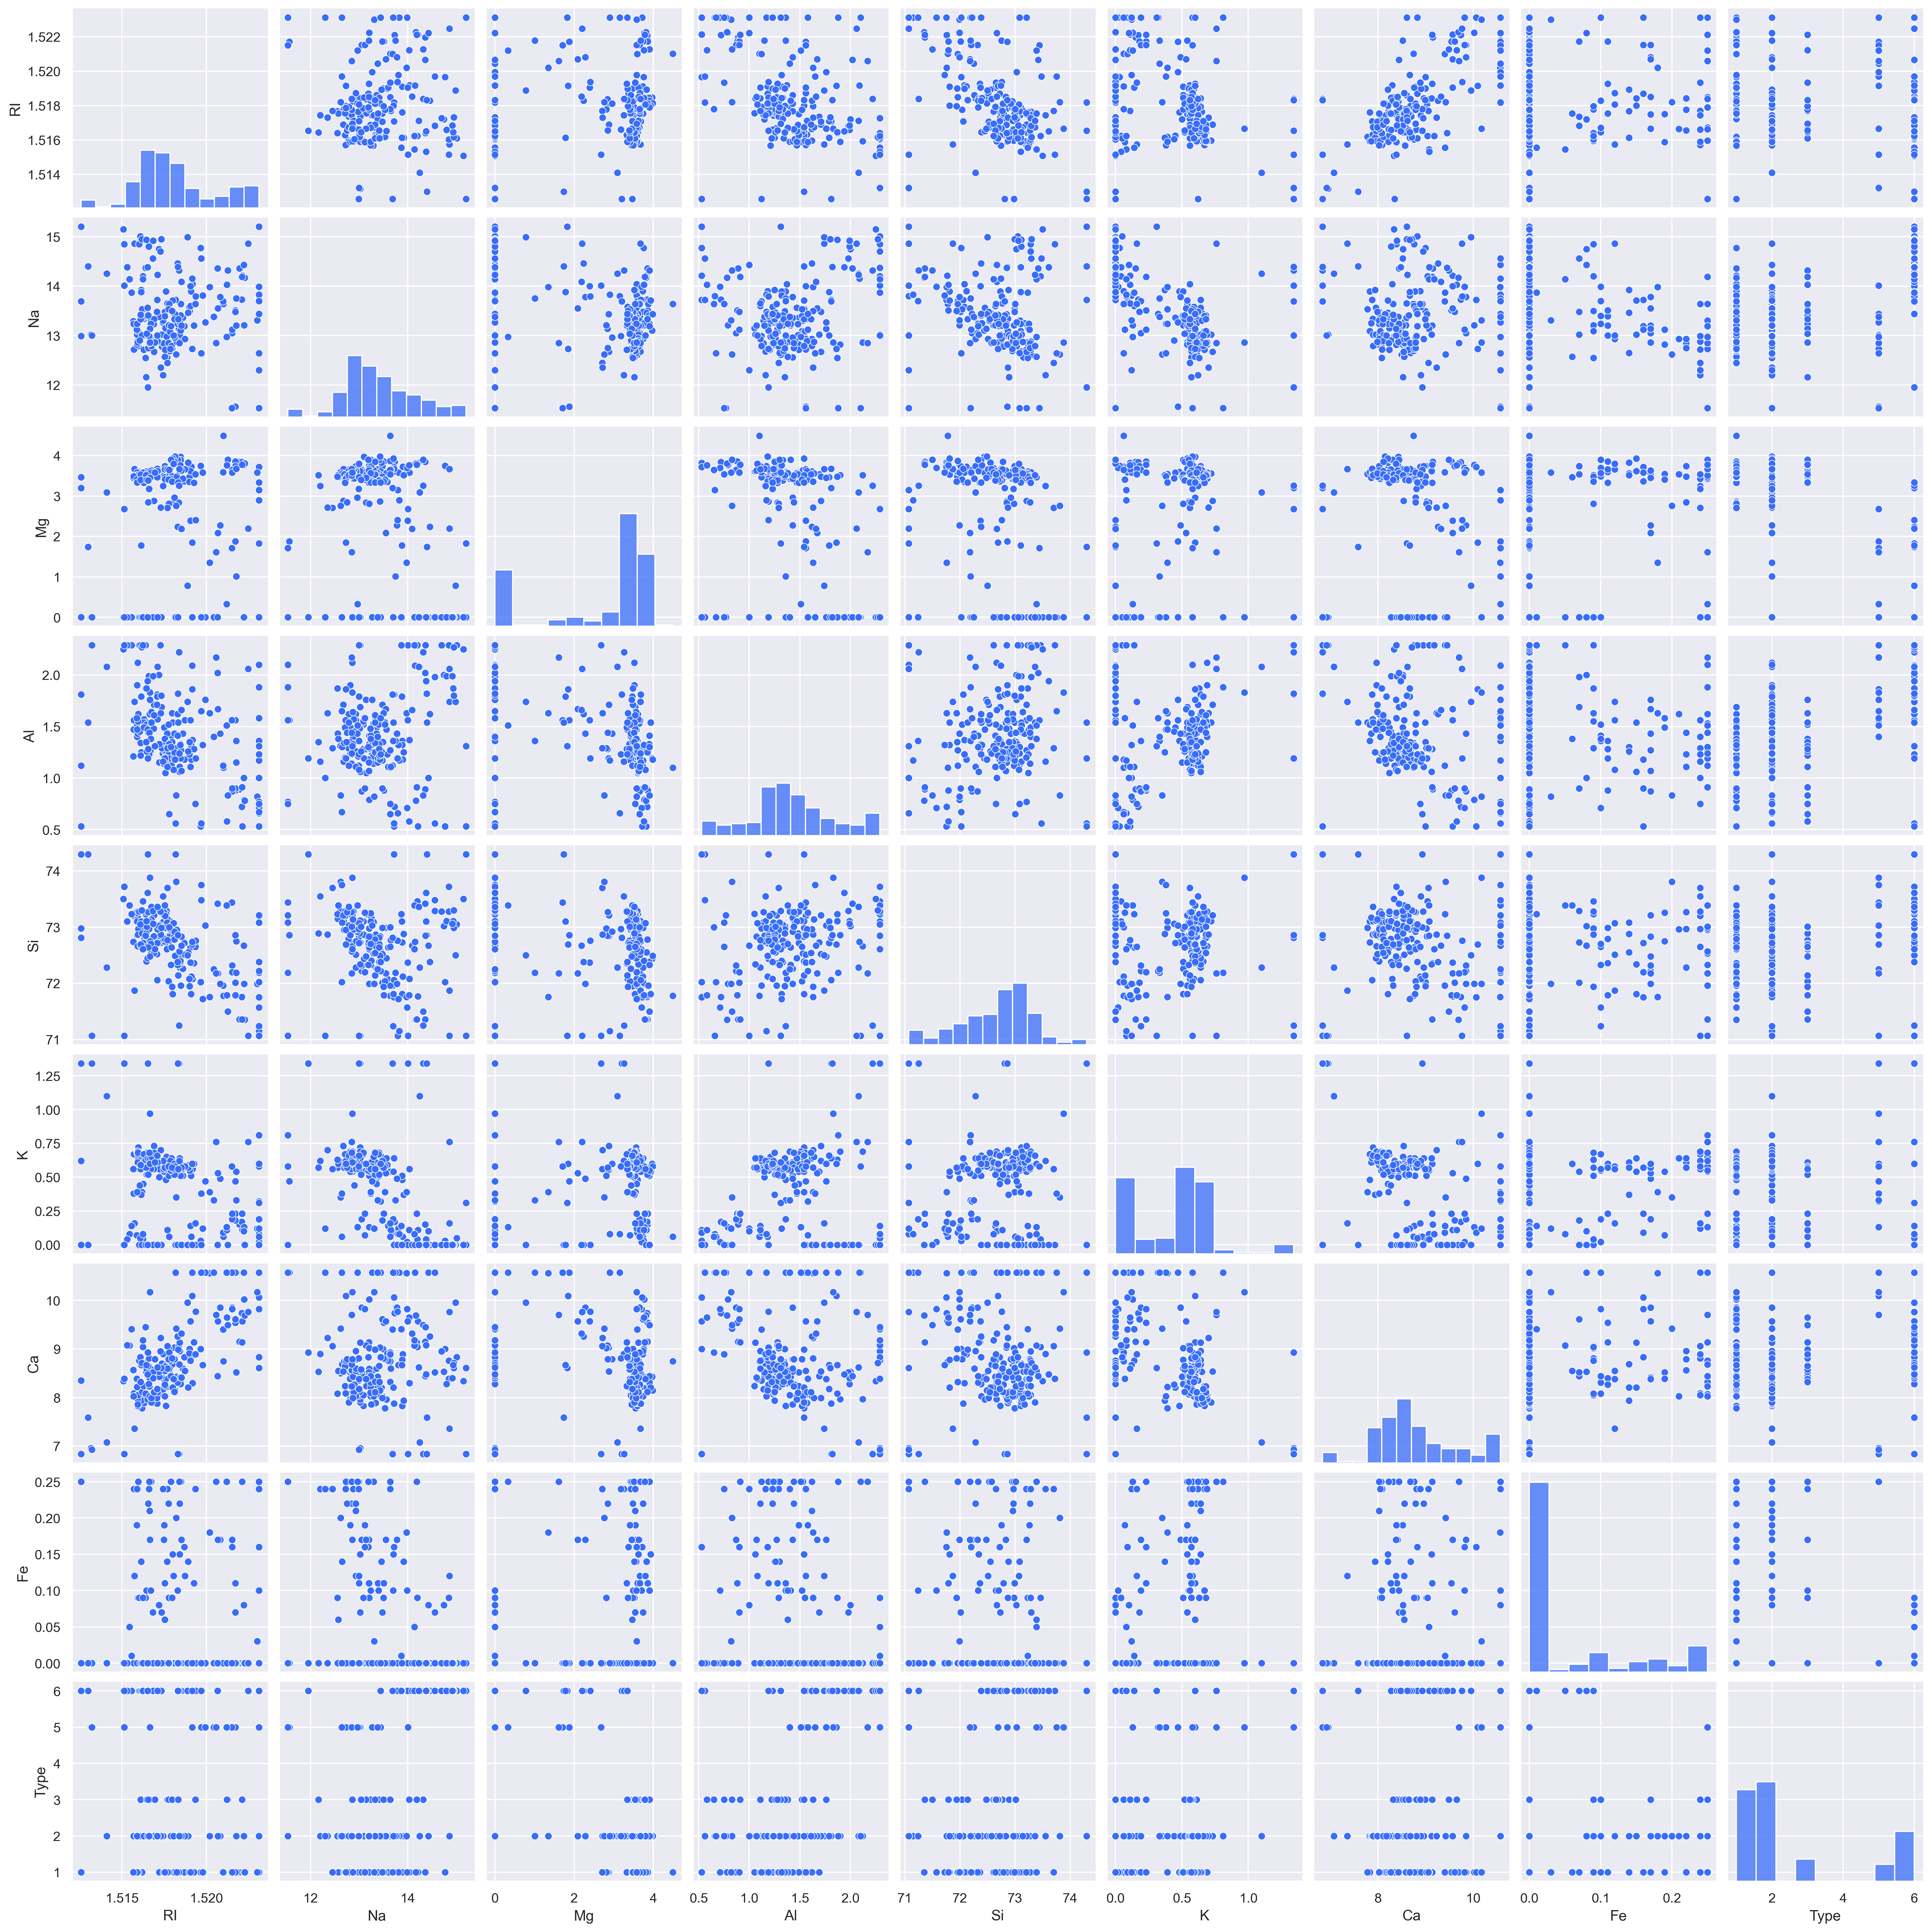

In [52]:
sns.pairplot(df)

In [53]:
#Correlation coefficient
df.corr(numeric_only=True)

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
RI,1.000000,-0.064047,-0.032721,-0.470391,-0.532124,-0.344942,0.760449,0.094617,-0.160699
Na,-0.064047,1.000000,-0.295178,0.208865,-0.164674,-0.493401,-0.102396,-0.251377,0.496850
Mg,-0.032721,-0.295178,1.000000,-0.474507,-0.210539,0.326625,-0.371040,0.101841,-0.740712
Al,-0.470391,0.208865,-0.474507,1.000000,0.142701,0.183350,-0.281499,-0.089357,0.587248
Si,-0.532124,-0.164674,-0.210539,0.142701,1.000000,-0.034263,-0.192171,-0.064187,0.171085
K,-0.344942,-0.493401,0.326625,0.183350,-0.034263,1.000000,-0.499029,0.078367,-0.234991
Ca,0.760449,-0.102396,-0.371040,-0.281499,-0.192171,-0.499029,1.000000,0.103456,0.069202
Fe,0.094617,-0.251377,0.101841,-0.089357,-0.064187,0.078367,0.103456,1.000000,-0.216006
Type,-0.160699,0.496850,-0.740712,0.587248,0.171085,-0.234991,0.069202,-0.216006,1.000000


**Heatmap**

<Axes: >

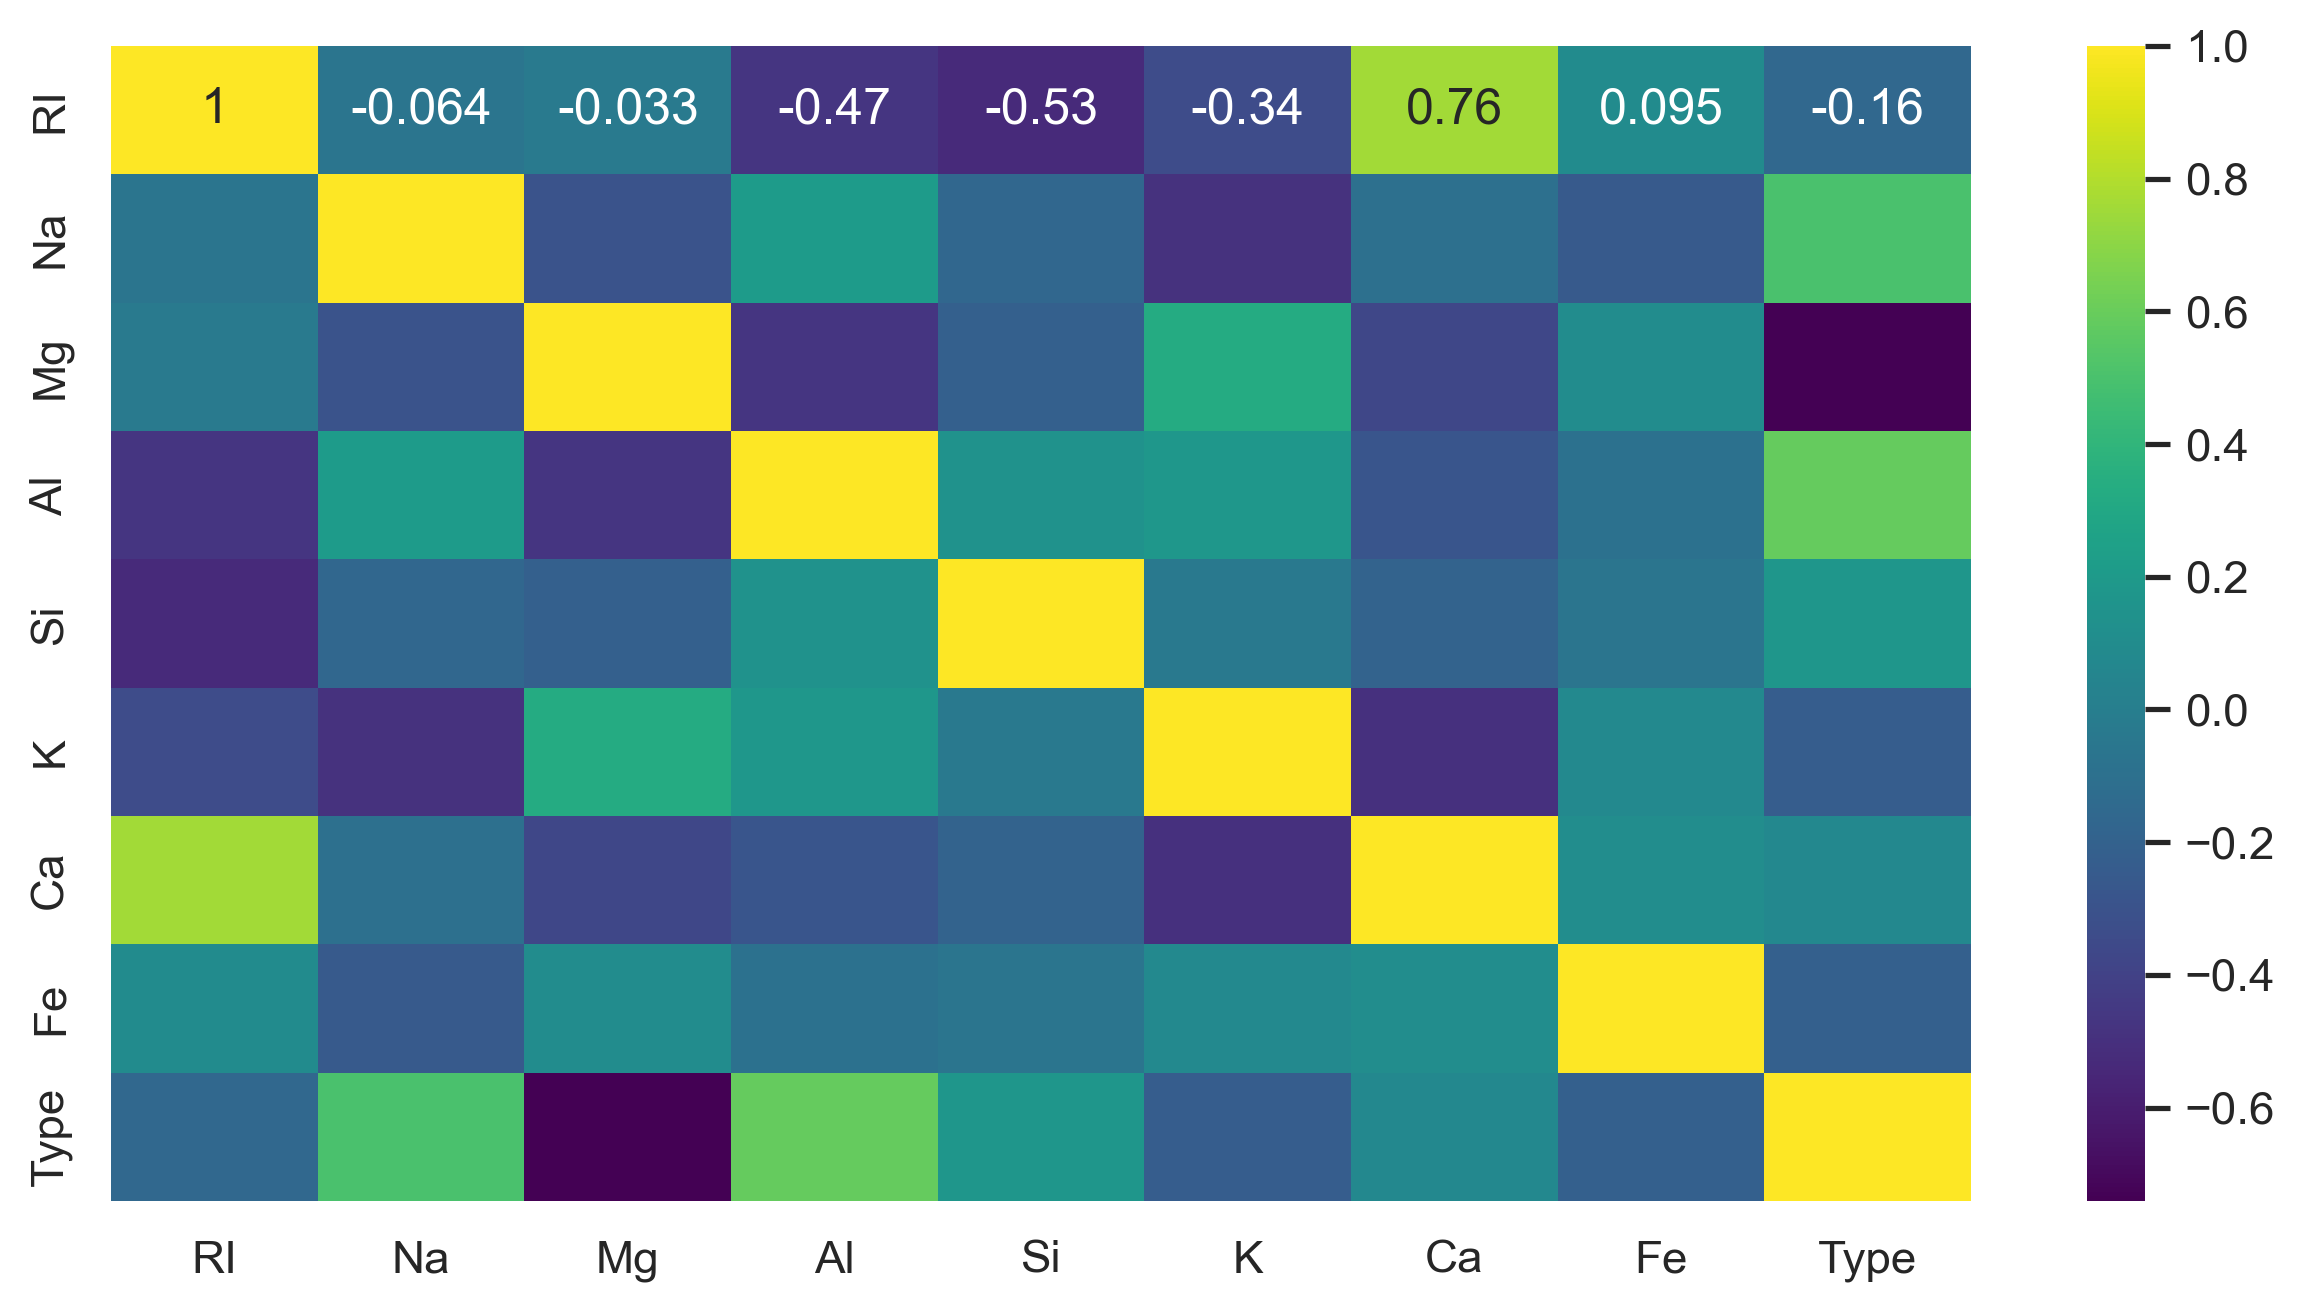

In [54]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

**Bagging Method**

<Axes: xlabel='Type', ylabel='count'>

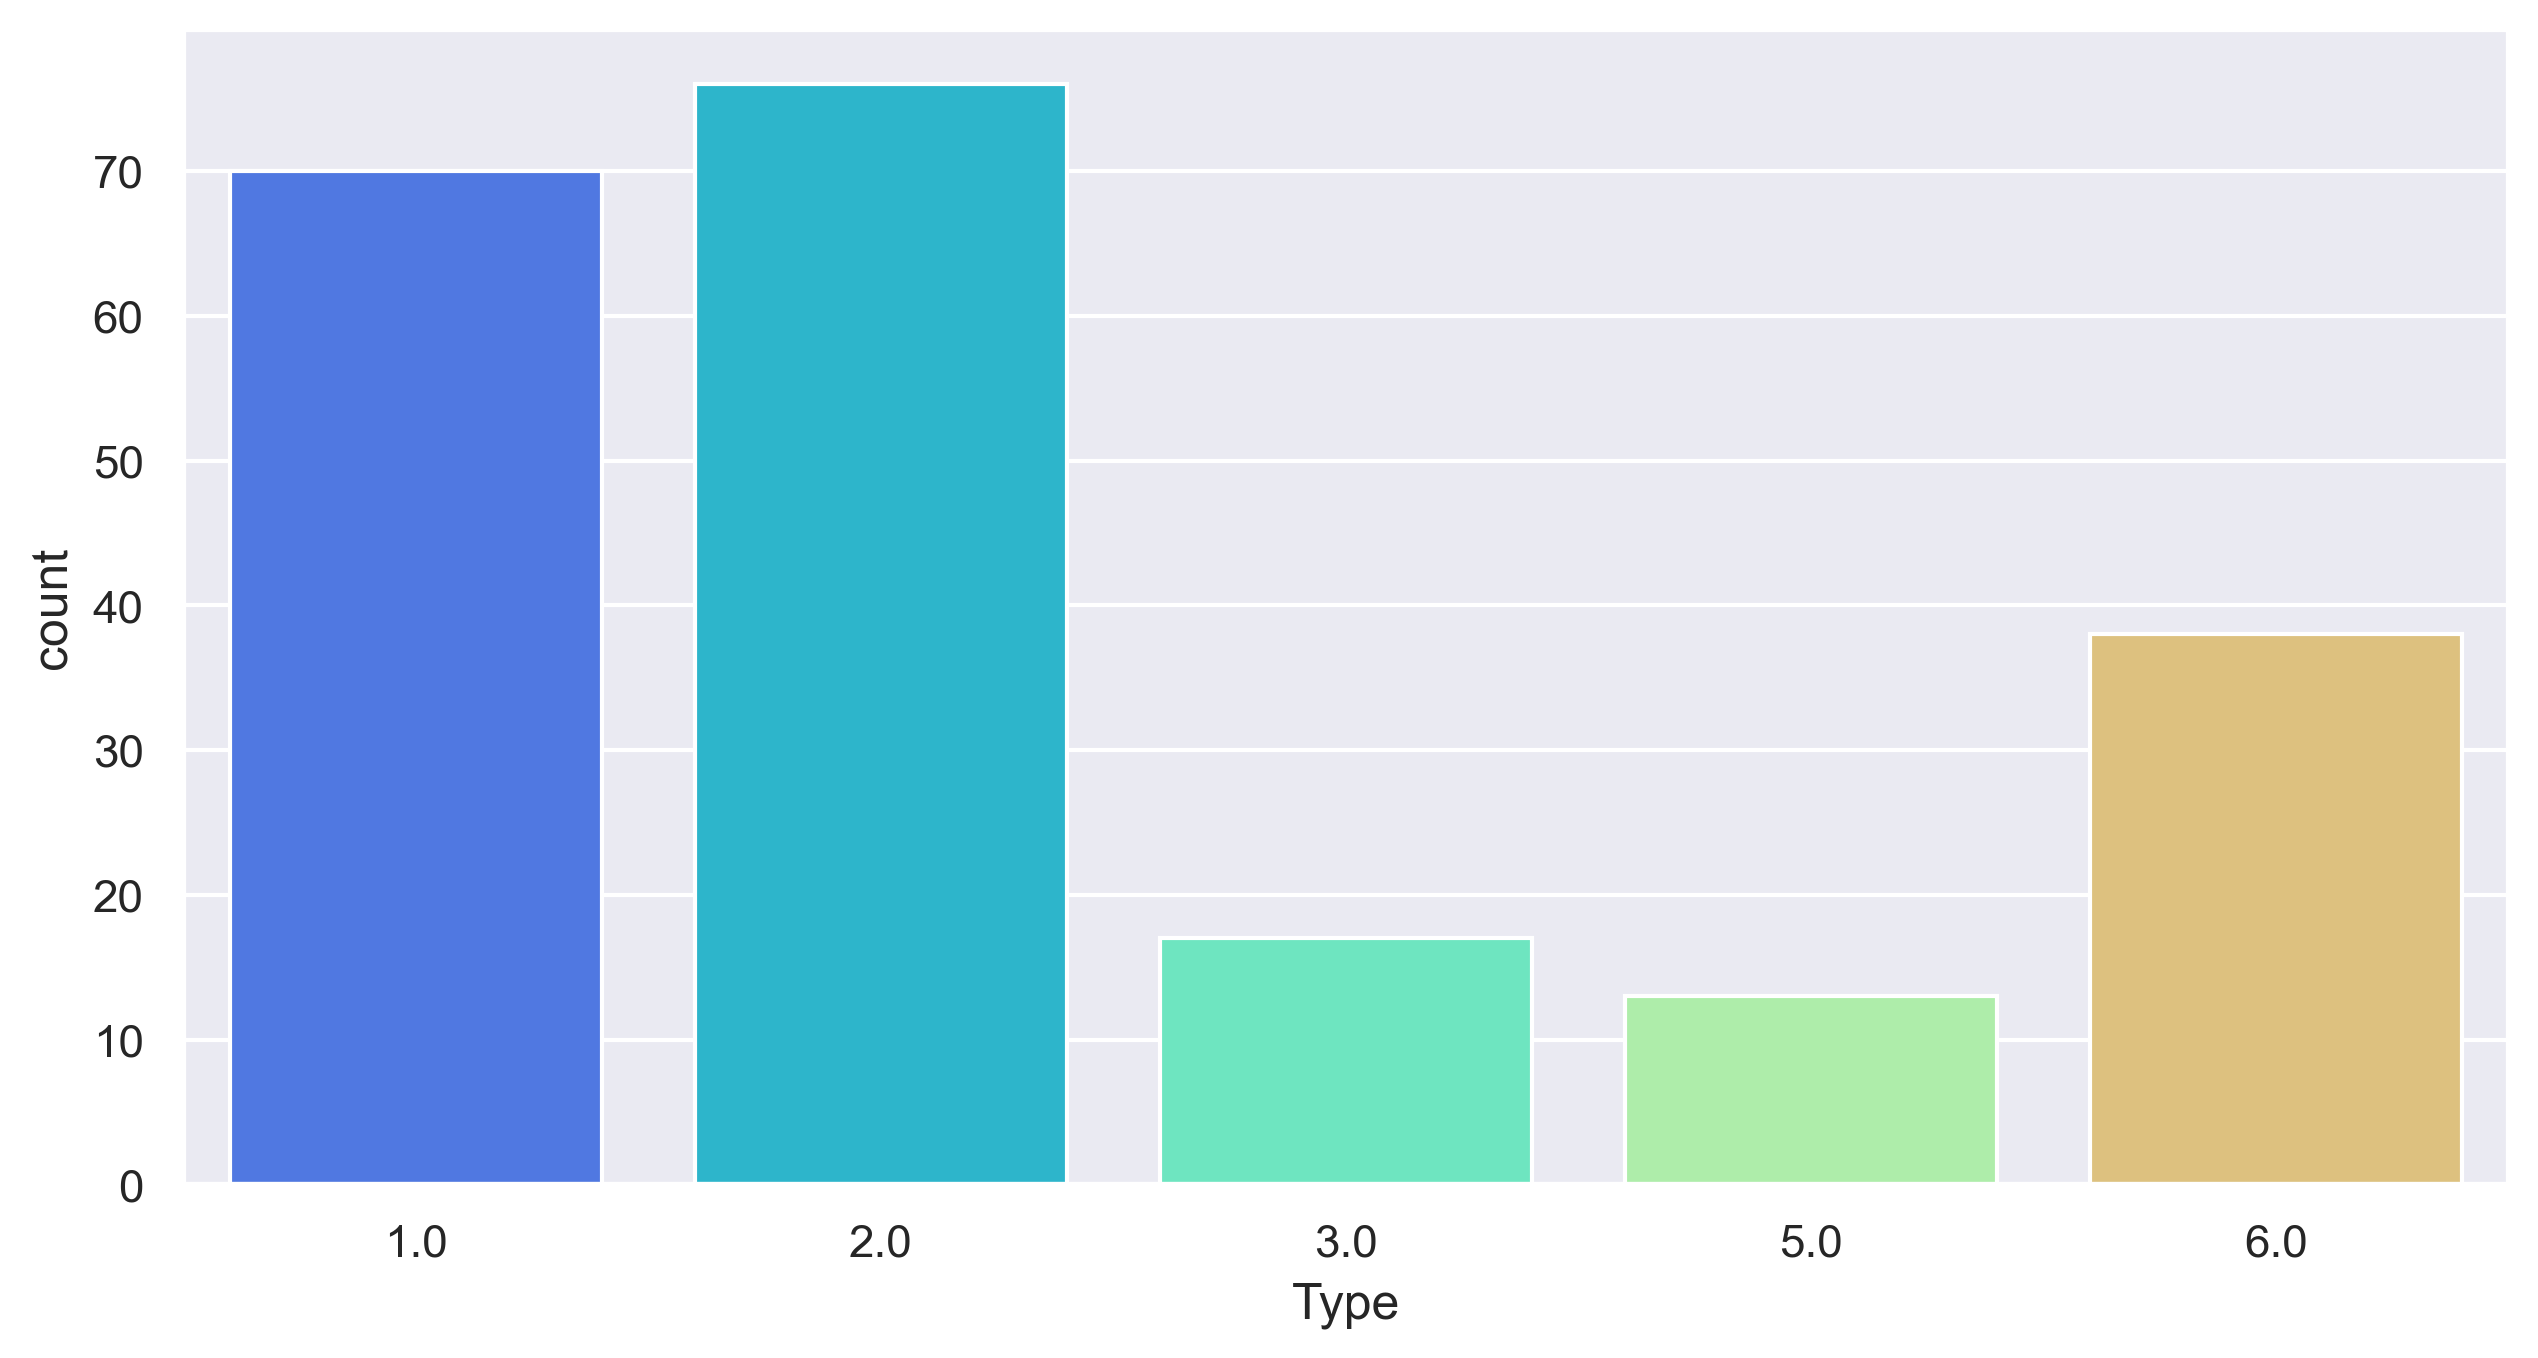

In [55]:

sns.countplot(x = df['Type'])

In [ ]:
#Split dataset training and testing part

In [56]:
x = df.iloc[:,:-1]
y = df['Type']

In [57]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [58]:
xtrain

,RI,Na,Mg,Al,Si,K,Ca,Fe
47,1.52311,13.99,3.70,0.71,71.57,0.02,9.82,0.1
202,1.51514,14.85,0.00,2.29,73.72,0.00,8.39,0.0
27,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.0
58,1.51754,13.48,3.74,1.17,72.99,0.59,8.03,0.0
40,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0
...,...,...,...,...,...,...,...,...
203,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,0.0
137,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.0
72,1.51593,13.09,3.59,1.52,73.10,0.67,7.83,0.0
140,1.51690,13.33,3.54,1.61,72.54,0.68,8.11,0.0


In [59]:
xtest

,RI,Na,Mg,Al,Si,K,Ca,Fe
108,1.52222,14.43000,0.00,1.00,72.67000,0.10,10.57125,0.08
206,1.51645,14.94000,0.00,1.87,73.11000,0.00,8.67000,0.00
106,1.52311,11.53125,0.00,2.10,71.06875,0.58,10.57125,0.25
107,1.52311,12.30000,0.00,1.00,71.06875,0.12,10.57125,0.24
51,1.51926,13.20000,3.33,1.28,72.36000,0.60,9.14000,0.11
33,1.51753,12.57000,3.47,1.38,73.39000,0.60,8.55000,0.06
59,1.51754,13.39000,3.66,1.19,72.79000,0.57,8.27000,0.11
152,1.51779,13.64000,3.65,0.65,73.00000,0.06,8.93000,0.00
4,1.51742,13.27000,3.62,1.24,73.08000,0.55,8.07000,0.00
31,1.51747,12.84000,3.50,1.14,73.27000,0.56,8.55000,0.00


In [60]:
ytrain

47     1.0
202    6.0
27     1.0
58     1.0
40     1.0
      ... 
203    6.0
137    2.0
72     2.0
140    2.0
37     1.0
Name: Type, Length: 171, dtype: float64

In [61]:
ytest

108    2.0
206    6.0
106    2.0
107    2.0
51     1.0
33     1.0
59     1.0
152    3.0
4      1.0
31     1.0
118    2.0
39     1.0
93     2.0
69     1.0
161    3.0
112    2.0
94     2.0
97     2.0
151    3.0
38     1.0
44     1.0
200    6.0
84     2.0
18     1.0
158    3.0
35     1.0
73     2.0
122    2.0
19     1.0
62     1.0
169    5.0
181    6.0
34     1.0
11     1.0
29     1.0
0      1.0
159    3.0
148    3.0
130    2.0
28     1.0
16     1.0
198    6.0
195    6.0
Name: Type, dtype: float64

**Random Forest Classifier**

In [63]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred = rfc.predict(xtest)

In [65]:
ypred

array([6., 6., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2.,
       1., 1., 1., 1., 6., 6., 1., 3., 3., 2., 2., 2., 1., 5., 6., 1., 1.,
       1., 1., 2., 3., 2., 1., 1., 6., 6.])

In [66]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.81      0.89      0.85        19
         2.0       0.82      0.75      0.78        12
         3.0       0.67      0.33      0.44         6
         5.0       1.00      1.00      1.00         1
         6.0       0.71      1.00      0.83         5

    accuracy                           0.79        43
   macro avg       0.80      0.80      0.78        43
weighted avg       0.79      0.79      0.78        43



In [ ]:
#Boosting Algorithms 

In [67]:
def prediction(model):
    model.fit(xtrain,ytrain)
    yp = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,ypred))

In [68]:
prediction(GradientBoostingClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.7209302325581395
              precision    recall  f1-score   support

         1.0       0.81      0.89      0.85        19
         2.0       0.82      0.75      0.78        12
         3.0       0.67      0.33      0.44         6
         5.0       1.00      1.00      1.00         1
         6.0       0.71      1.00      0.83         5

    accuracy                           0.79        43
   macro avg       0.80      0.80      0.78        43
weighted avg       0.79      0.79      0.78        43



In [69]:
df['Type'].unique()

array([1., 2., 3., 5., 6.])

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
209    6.0
210    6.0
211    6.0
212    6.0
213    6.0
Name: Type, Length: 214, dtype: float64

In [72]:
le = LabelEncoder()

y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [73]:
ytrain

47     1.0
202    6.0
27     1.0
58     1.0
40     1.0
      ... 
203    6.0
137    2.0
72     2.0
140    2.0
37     1.0
Name: Type, Length: 171, dtype: float64

In [74]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [75]:
ytrain

array([1, 0, 1, 4, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 3, 1, 0, 2, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 4, 0, 0, 1, 1, 0, 0, 4, 4, 0, 0,
       1, 4, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 2, 4, 0, 4, 2, 1, 3, 0, 0,
       1, 0, 1, 0, 4, 2, 1, 0, 4, 0, 1, 3, 0, 2, 0, 1, 0, 1, 4, 3, 4, 0,
       1, 0, 0, 1, 1, 1, 4, 4, 1, 0, 0, 0, 4, 1, 0, 3, 1, 4, 1, 4, 4, 0,
       0, 1, 0, 3, 4, 3, 0, 0, 1, 0, 0, 2, 4, 4, 1, 0, 2, 4, 0, 0, 2, 1,
       2, 1, 1, 1, 1, 4, 1, 1, 4, 0, 4, 1, 1, 0, 1, 4, 1], dtype=int64)